In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Some Important Probability Distributions

- Some popular distributions in data science are:
  - Binomial and Normal (Gaussian), which we've already seen.
  - Poisson
  - Negative Binomial
  - Power Law

### The Poisson Distribution

* Used in experiments that model the numbers of events in a fixed period of time or a fixed area of space
  * assume the independence of the events
* Ex.: 
    - Number parrotfish in a transect
    - Reproductive pattern in some shrimp
       * i.e., number of eggs a shrimp bears
    - Abundance (number) of some of the common sponges or corals a quadrats
    - Etc.


### Properties of the Poisson Distribution

* Poisson has only one parameter that determines its shape and location.
  * The parameter is referred to as $\lambda$

* A random variable $X$ is Poisson, written $X \sim Poisson(\lambda)$, if:
  * $X$ is the number of events in a given time period or space area
    * Countably infinite positive values [0, 1, ... ]
    
  * The events are independent (The occurrence of events does not increase the likelihood of other events occurring)
    * As opposed to the binomial, these are not trials
    
  * The mean and the variance of a Poisson are represented using the same parameter $\lambda$.
  
* The $pmf$ of a Poisson is:

$$
p(X=x) = \frac{e^{_\lambda} \lambda^x}{x!}
$$

#### Example

* Ex 2. Assuming that the number of eggs a shrimp bears is distributed according to a Poisson distribution with $\lambda = 10$. 

* The probability distribution of the random variable $X$ is:

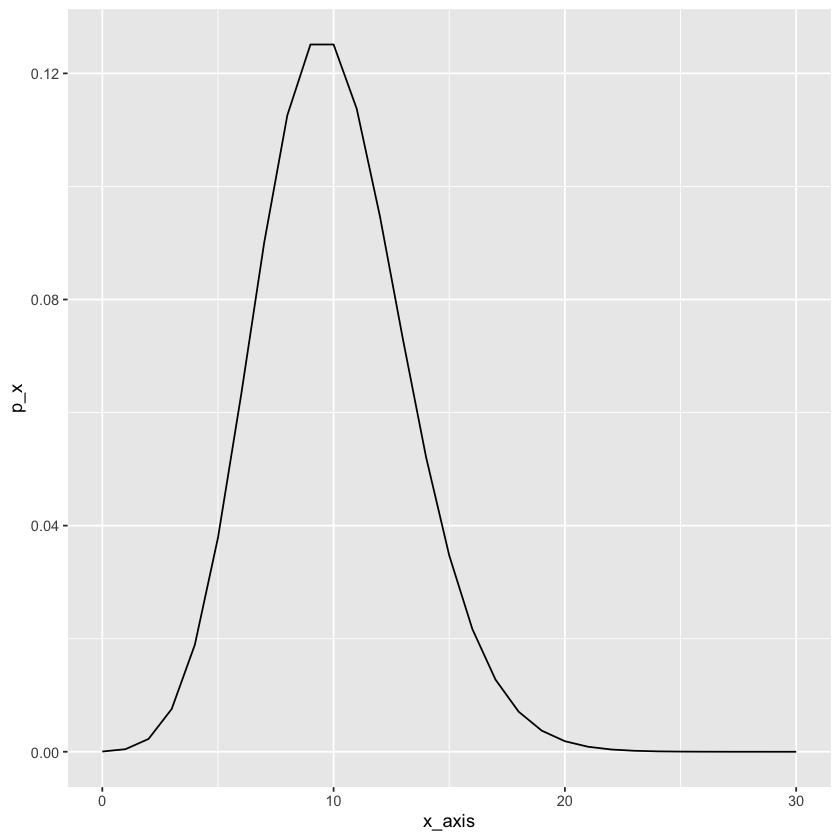

In [12]:
lambda = 10
x_axis= (0:30)
p_x = dpois(x_axis, lambda)

ggplot() +
  geom_line(aes(x=x_axis, y=p_x))



### Example

- The probability that a shrimp bears $x \in  \{5, 10, 30, 50\}$) shrimp is:



In [25]:
names(p_x) = x_axis
p_x

0            1            2            3            4            5 
4.539993e-05 4.539993e-04 2.269996e-03 7.566655e-03 1.891664e-02 3.783327e-02 
           6            7            8            9           10           11 
6.305546e-02 9.007923e-02 1.125990e-01 1.251100e-01 1.251100e-01 1.137364e-01 
          12           13           14           15           16           17 
9.478033e-02 7.290795e-02 5.207710e-02 3.471807e-02 2.169879e-02 1.276400e-02 
          18           19           20           21           22           23 
7.091109e-03 3.732163e-03 1.866081e-03 8.886101e-04 4.039137e-04 1.756147e-04 
          24           25           26           27           28           29 
7.317277e-05 2.926911e-05 1.125735e-05 4.169389e-06 1.489067e-06 5.134715e-07 
          30 
1.711572e-07

In [40]:
c(p_x["5"], p_x["10"], p_x["30"], p_x["50"])

5           10           30         <NA> 
3.783327e-02 1.251100e-01 1.711572e-07           NA

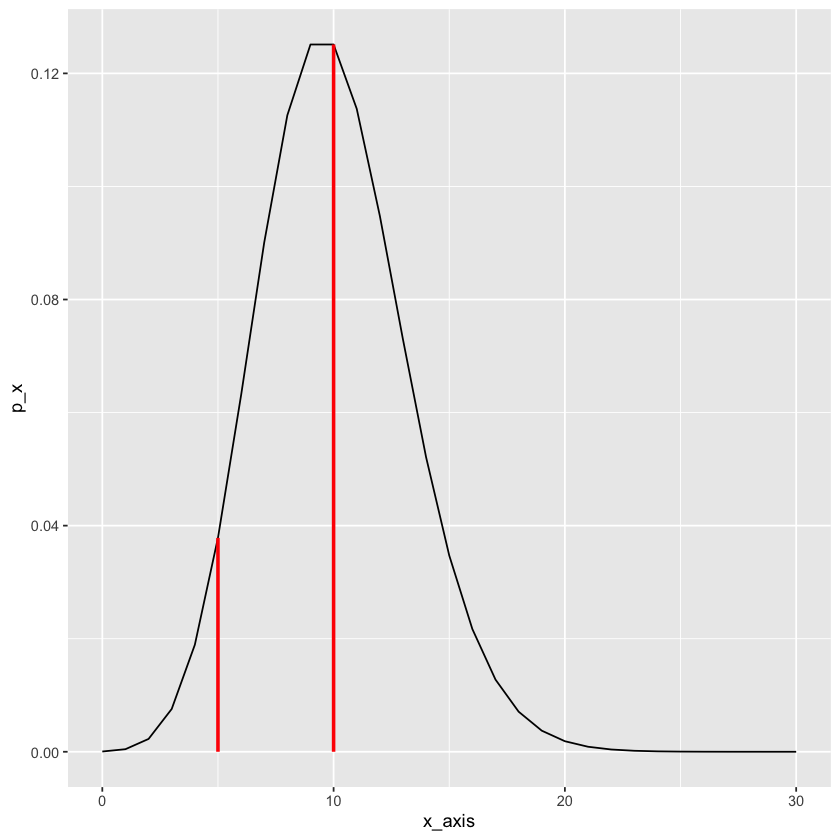

In [38]:
ggplot() +
  geom_line(aes(x=x_axis, y=p_x)) +
  geom_segment(aes(x = 5, y = 0, xend = 5, yend = p_x["5"]), color="red", size =1) +
  geom_segment(aes(x = 10, y = 0, xend = 10, yend = p_x["10"]), color="red", size =1) +
  geom_segment(aes(x = 30, y = 0, xend = 30, yend = p_x["30"]), color="red", size =1) +
  geom_segment(aes(x = 50, y = 0, xend = 50, yend = p_x["50"]), color="red", size =1)


### Notes About the Poisson
- Not all counts data are Poisson
  - Overdispersed data where the mean is not equal to the variance is not Poisson
- For values of $\lambda > 40$, the Poisson can be approximated as Gaussian with $\mu=$ and $\sigma = \sqrt{\lambda}$
  - This can be shown mathematically
  - Makes the math easy 

- Recall that for the Poisson distribution, the mean and variance are both modeled with the same parameter $\lambda$

  - What is the significance of this statement?

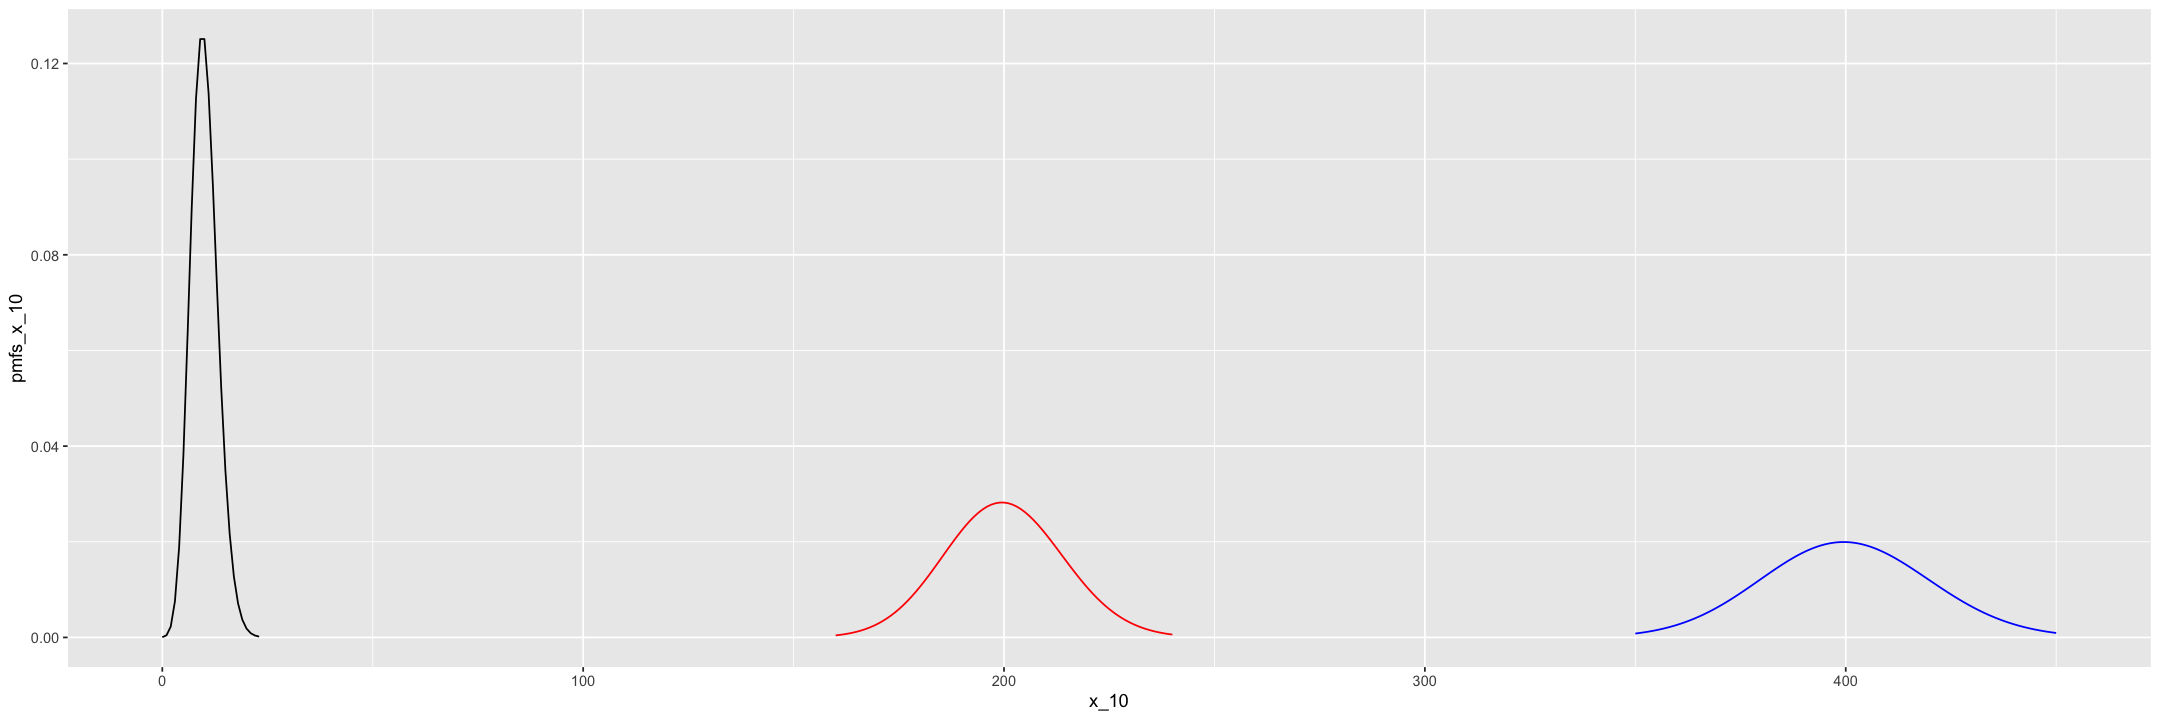

In [52]:
options(repr.plot.width = 18, repr.plot.height = 6)

x_10 = (0:23)
pmfs_x_10 = dpois(x_10, 10)

x_200 = (160:240)
pmfs_x_200 = dpois(x_200, 200)

x_400 = (350:450)
pmfs_x_400 = dpois(x_400, 400)

ggplot() +
  geom_line(aes(x_10, pmfs_x_10)) +
  geom_line(aes(x_200, pmfs_x_200), color="red") +
  geom_line(aes(x_400, pmfs_x_400), color="blue")


### The Negative Binomial Distribution

* The _negative_ _binomial_ ( $NB$ ) is a discrete distribution of the number of trials with binary trials (success and failure, true and false, healthy and diseased, etc.) required before the $k^{th}$ success.

Ex.:
  * Number of times you need to roll a die to get five ones
  * The number of corals you need to survey to find 10 subjects that have had some disease
  * the number of shrimp you need to catch to find one bearing 15 eggs


### The Negative Binomial Versus Biomial

- The negative binomial is not to be confused with the binomial, where the random variable is the number of successes in a fixed number of trials


- You can also think of the negative binomial as the total number of failures before you see $k$ successes.
  - This definition leads to slightly different equations, but the intuition is similar. 

### Properties of the Negative Binomial Distribution

* The sequence of trials is independent
* Each of the trials is unambiguously a success or a failure
* The probability of success is consistently equal to $p$
* $X$ represents the total number of trials before $k$ successes ($X-k$ failures) 
  * As opposed to the binomial, the number of trials is not set
    * Inverses the binomial problem, hence the name (negative)

### Example

* You roll a fair die until it lands on the face 1 exactly 7 times (the occurrences may or may not be consecutive).
   * p[1] = 1/6
   * $X$ can be any value such that $x \in [7, \infty]$


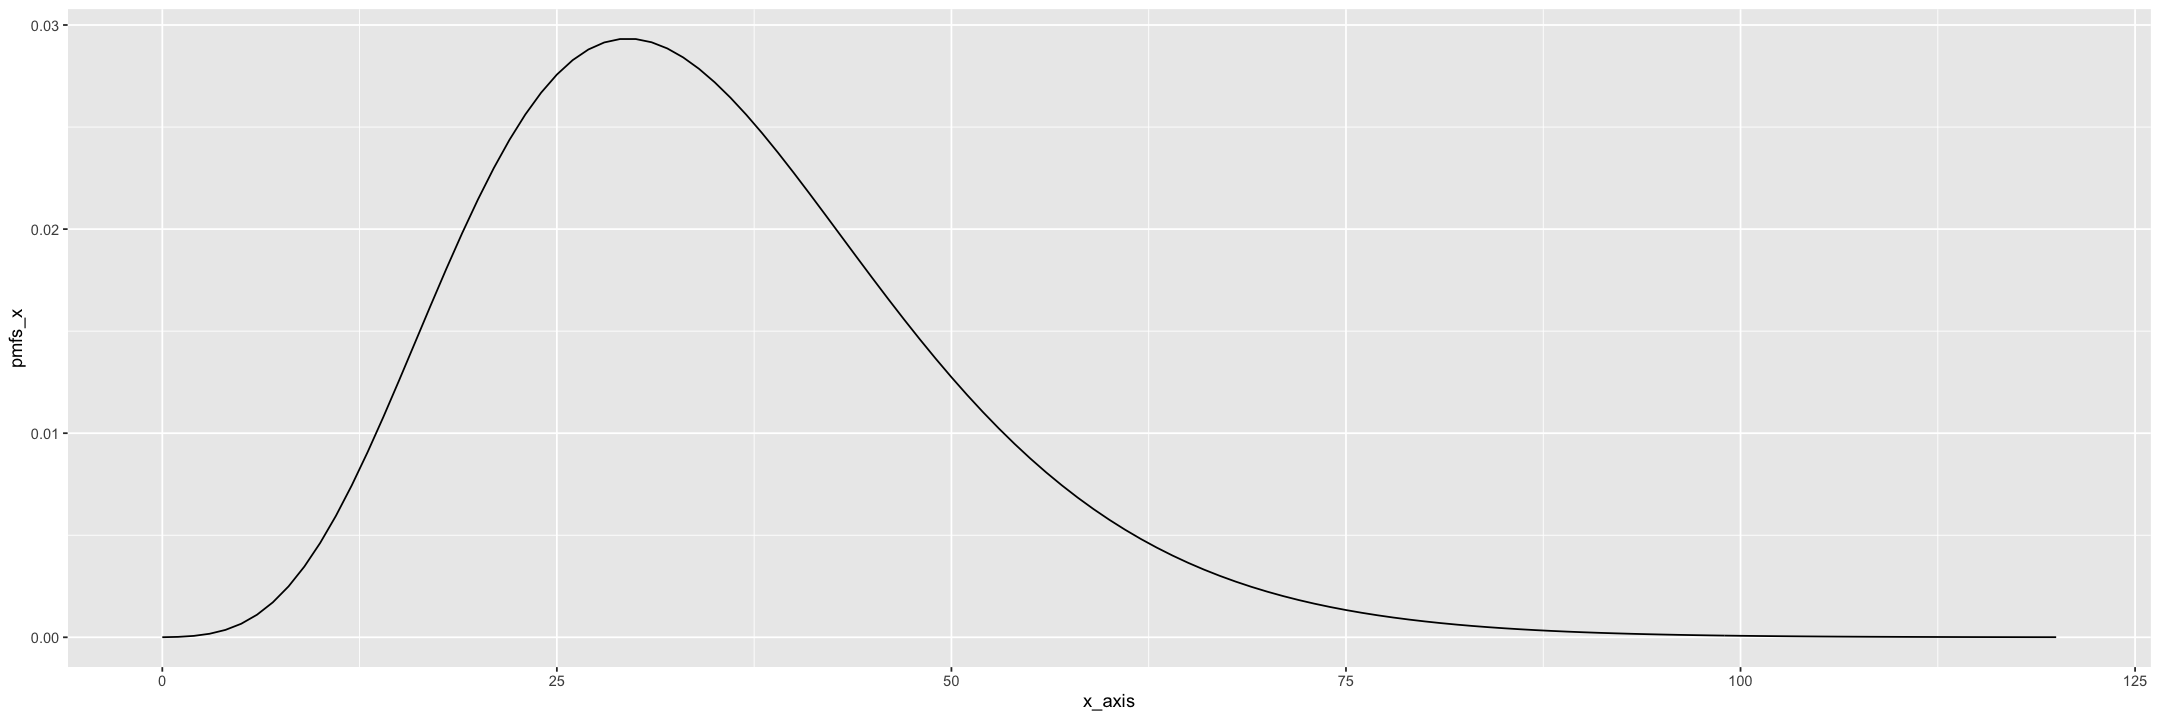

In [57]:
p=1/6

x_axis = (0:120)

pmfs_x = dnbinom(x_axis, 7, p)

ggplot() +
  geom_line(aes(x_axis, pmfs_x))


In [82]:
c(max(pmfs_x), which.max(pmfs_x))

[1]  0.02931207 30.00000000

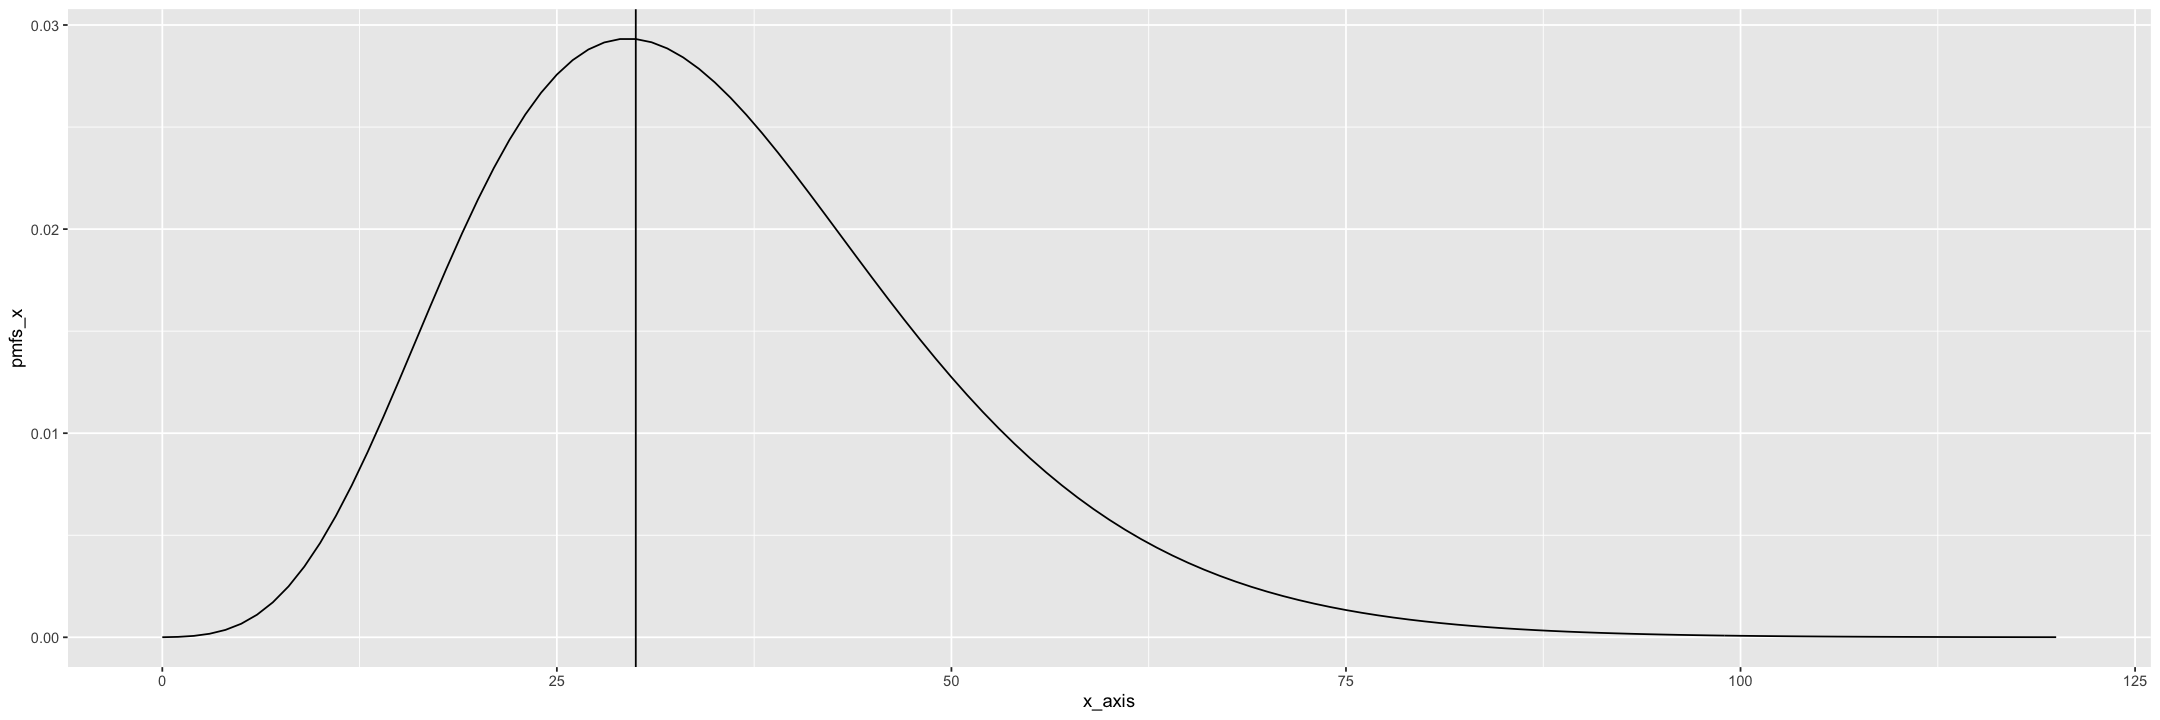

In [86]:
p=1/6

x_axis = (0:120)

pmfs_x = dnbinom(x_axis, 7, p)

ggplot() +
  geom_line(aes(x_axis, pmfs_x)) +
  geom_vline(aes(xintercept=30))  


In [87]:
print("Sum of firt chunk")
sum(pmfs_x[1:30])

print("Sum of second chunk")
sum(pmfs_x[-(1:30)])

print("Sum of total")
sum(pmfs_x)


[1] "Sum of firt chunk"


[1] 0.393252

[1] "Sum of second chunk"


[1] 0.6067101

[1] "Sum of total"


[1] 0.9999621

#### Expected Value and Value with Highest Probability

- The mean, or expectation, is not the most probable value
- When a distribution is symmetrical, values occur in the same frequency on both sides of the mean
  - Forces expected value to be the most probable values in the long run
    
- When a distribution is asymmetrical, values on one side of the most probable value occur with more probability than on the other side 
  - Forces expected value to be different from the value with the highest probability

In [79]:
rnbinom(10, 7, 1/6)


[1] 47 31 20 41 18 36 45 42 22 45

In [81]:
mean(rnbinom(1000, 7, 1/6))


[1] 34.87